# Exploratory Data Analysis of Istanbul Airbnb Data

## Import Required Packages

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy.stats import iqr, skew, kurtosis

## Load Data

In [2]:
import_fp = Path("../data/processed/istanbul_airbnb_processed.csv")
airbnb_df = pd.read_csv(import_fp, encoding = "utf-8-sig")

import_fp = Path("../data/processed/istanbul_airbnb_processed_shapefile.shp")
airbnb_gdf = gpd.read_file(import_fp)

import_fp = Path("../data/external/district_income.xlsx")
extra_stats_df = pd.read_excel(import_fp, sheet_name = "main")

import_fp = Path("../data/external/istanbul_districts.shp")
istanbul_districts_gdf = gpd.read_file(import_fp)

## Summary Statistics

### Get column names

In [3]:
column_names = airbnb_df.columns
column_names

Index(['listing_id', 'name', 'host_id', 'host_name', 'district_eng',
       'latitude', 'longitude', 'room_type', 'price', 'district_tr'],
      dtype='object')

### Summary statistics without normalization

#### Arithmetic Mean, Median and Mode for Price

In [4]:
airbnb_mean_price = airbnb_df.loc[:,"price"].mean()
airbnb_median_price = airbnb_df.loc[:,"price"].median()
airbnb_mode_price = airbnb_df.loc[:,"price"].mode()
print(airbnb_mean_price, airbnb_median_price, airbnb_mode_price)

379.7643146796431 212.0 0    103
dtype: int64


#### Minimum price and Maximum Price

In [5]:
airbnb_min_max_price = (airbnb_df.loc[:,"price"].min(), airbnb_df.loc[:,"price"].max())
airbnb_min_max_price 

(18, 67609)

#### Price IQR and SD

In [6]:
airbnb_price_iqr = iqr(airbnb_df.loc[:,"price"], axis = 0)
airbnb_price_sd = np.std(airbnb_df.loc[:,"price"], axis = 0)
print(airbnb_price_iqr, airbnb_price_sd)

254.0 1286.6569838490234


#### Price Skewness and Kurtosis

In [7]:
airbnb_price_skewness = skew(airbnb_df.loc[:,"price"], axis = 0)
airbnb_price_kurtosis = kurtosis(airbnb_df.loc[:,"price"], axis = 0, fisher = False)
print(airbnb_price_skewness, airbnb_price_kurtosis)

33.74442853259717 1530.678285904718


#### Plotting out the distribution

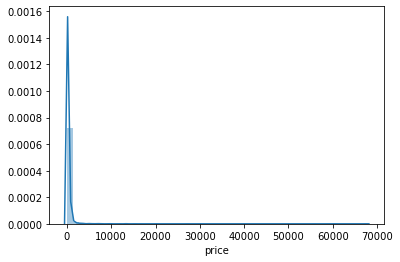

In [8]:
airbnb_price_distribution = sns.distplot(airbnb_df.loc[:,"price"])

#### Descriptive statistics per district

In [11]:
airbnb_grouped_by_district = airbnb_df.groupby(by = "district_eng")

In [100]:
airbnb_description_per_district = airbnb_grouped_by_district["price"].agg(["count","min", "max","mean","median",iqr,"std", skew, kurtosis]).sort_values(by = "count",
                                                                                                    ascending = False)
airbnb_description_per_district 

,count,min,max,mean,median,iqr,std,skew,kurtosis
district_eng,,,,,,,,,
Beyoglu,4879,30,15203,389.503997,260.0,260.00,687.299778,11.250238,173.573305
Sisli,2707,18,55436,371.013299,206.0,296.00,1317.316796,32.011724,1228.544487
Fatih,2354,24,67609,546.076466,272.0,285.00,2207.306871,21.901232,589.744701
Kadikoy,1895,30,11998,212.068602,139.0,157.00,353.646445,21.177662,659.636423
Besiktas,1533,30,15118,339.360078,206.0,230.00,652.958457,11.884891,208.989222
Uskudar,661,30,20283,278.786687,127.0,163.00,951.037503,16.080725,309.417709
Esenyurt,456,30,60473,395.024123,200.0,175.00,2845.160473,20.735103,434.935151
Kagithane,431,24,4560,235.238979,127.0,223.00,304.125702,7.446658,94.538045
Sariyer,323,30,18021,818.111455,206.0,496.00,1829.254712,4.877879,31.457327


In [66]:
airbnb_districts_prices = airbnb_grouped_by_district["price"]

#### Distribution of price per district

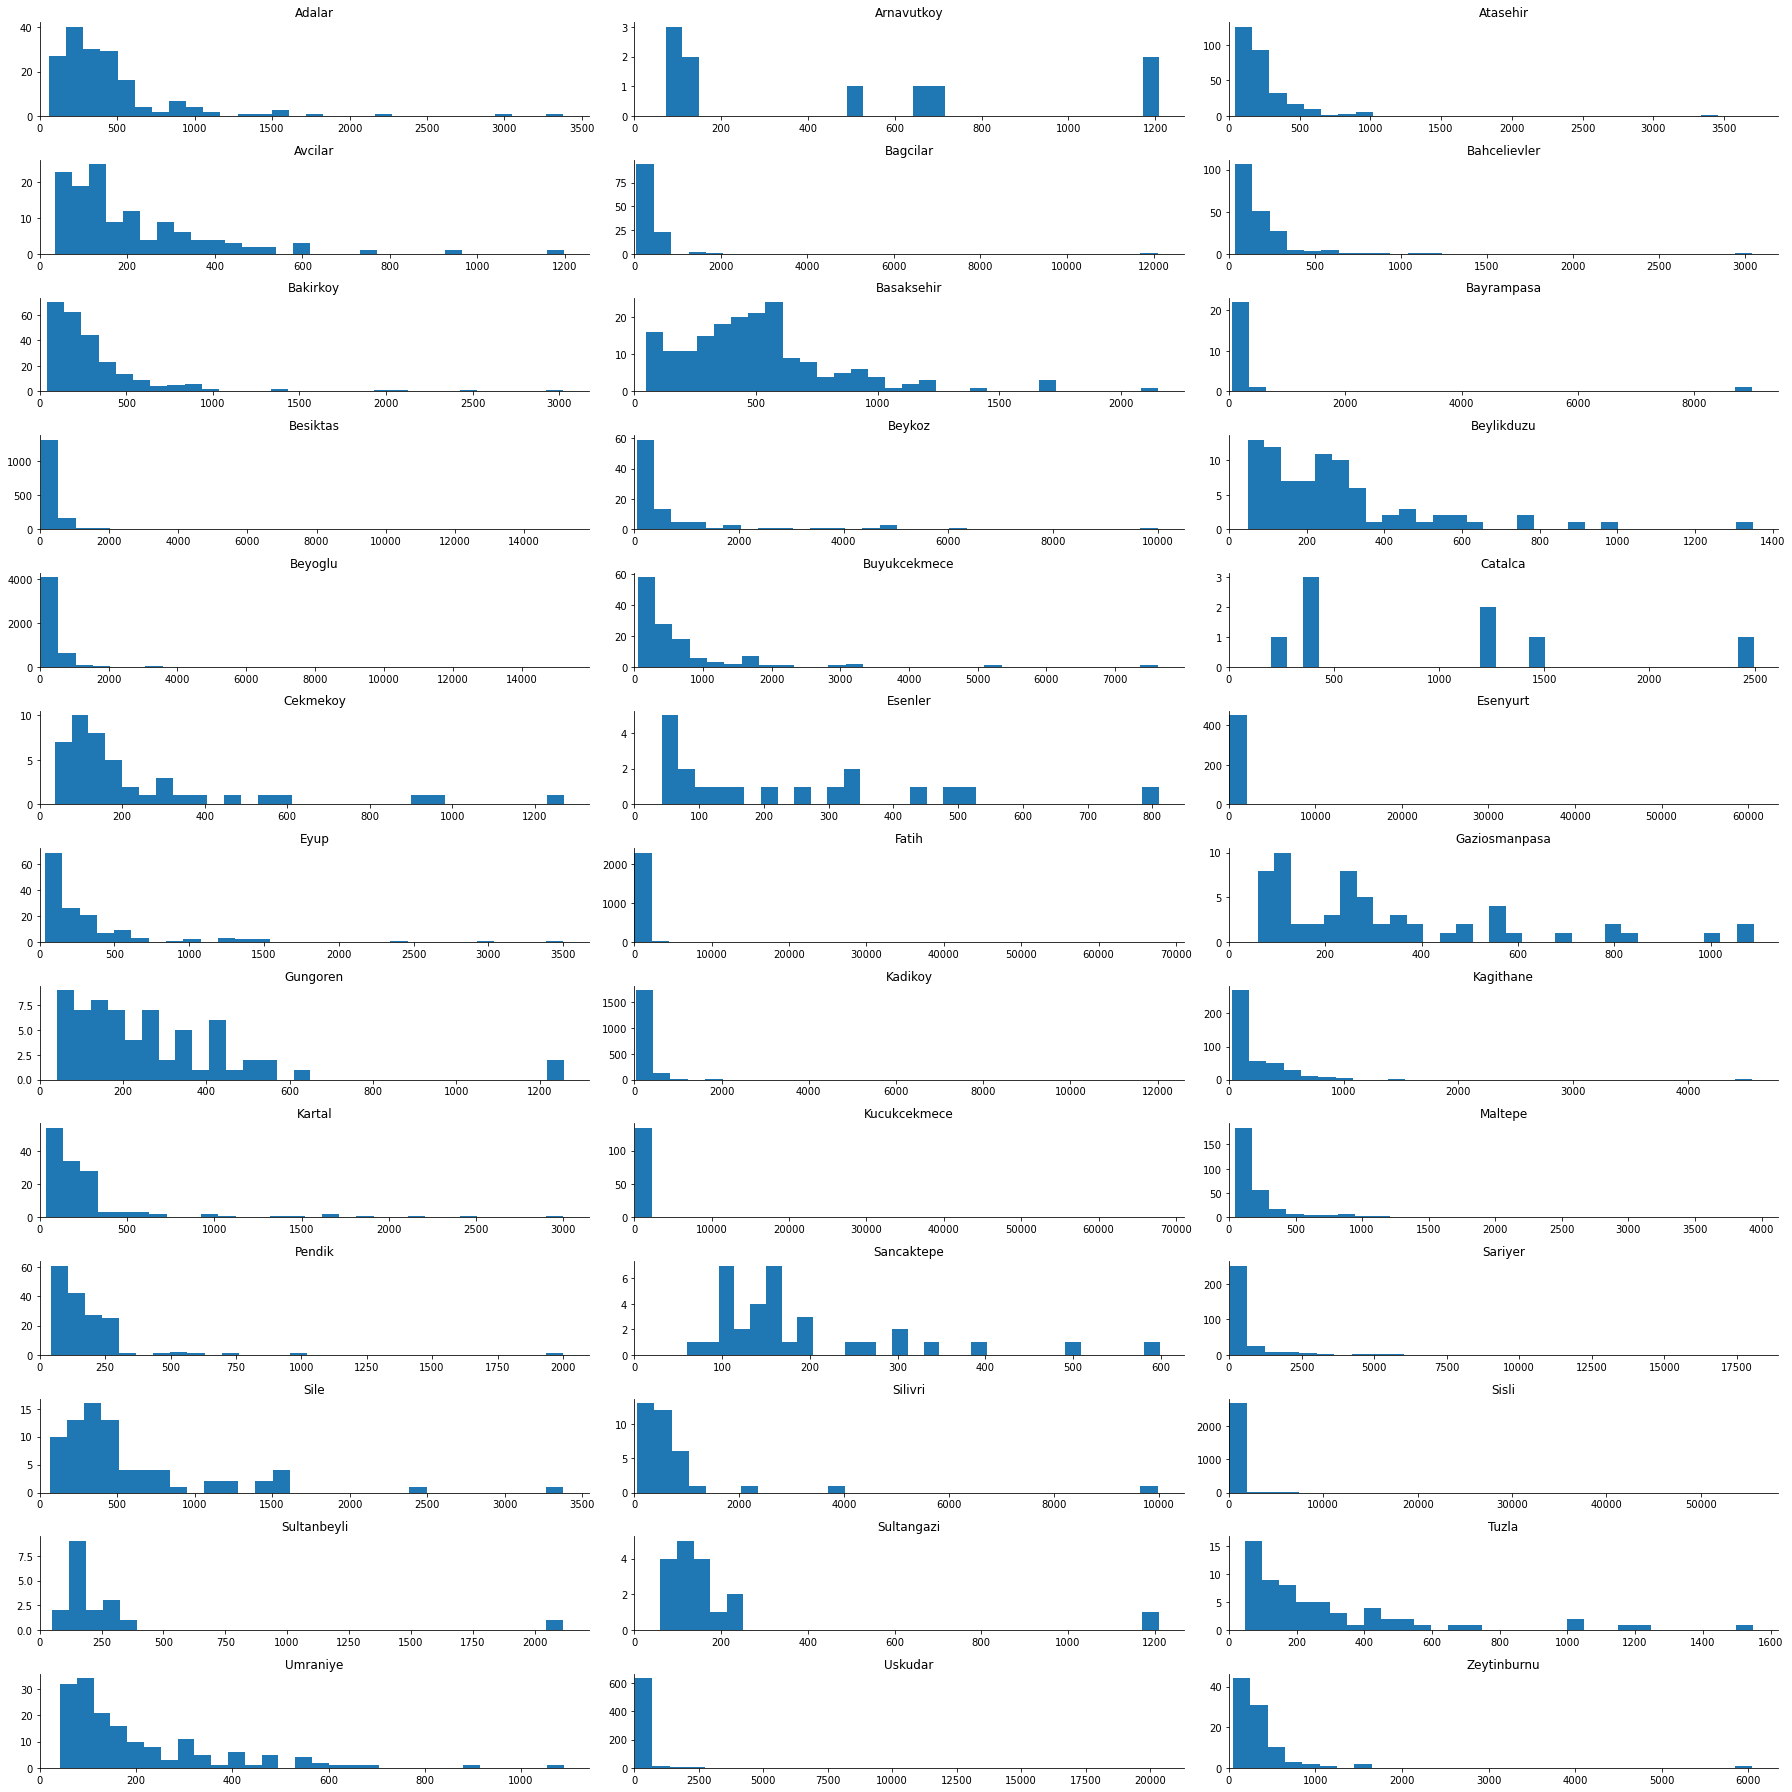

In [97]:
i = 1
fig = plt.figure(figsize = (25.00, 25.00))
for group in airbnb_districts_prices.groups:
    ax = fig.add_subplot(13, 3, i)
    ax.hist(airbnb_districts_prices.get_group(group),
           bins = 30)
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_xlim(0)
    
    ax.set_title(group)
    
    fig.tight_layout()
    
    i += 1
    

#### Average rental price per room type 

In [14]:
airbnb_grouped_by_room_type = airbnb_df.groupby("room_type")
airbnb_avg_price_per_room_type = airbnb_grouped_by_room_type["price"].mean().sort_values(ascending = False)
airbnb_avg_price_per_room_type

room_type
Entire home/apt    473.327796
Private room       303.886878
Shared room        163.501859
Name: price, dtype: float64

### Summary statistics for normalization - +- 1.5 IQR as outliers

In [15]:
price_iqr = iqr(airbnb_df.loc[:,"price"], axis = 0)

#Calculate q3 and q1
q1 = airbnb_df["price"].quantile(0.25)
q3 = airbnb_df["price"].quantile(0.75)

In [16]:
#Let's see what the IQR is
print(price_iqr)

254.0


In [17]:
#Create min and max mask for +/* 1.5 IQR
min_mask = airbnb_df.loc[:,"price"] >= q1 - (1.5 * price_iqr)
max_mask = airbnb_df.loc[:,"price"] <= q3 + (1.5 * price_iqr)
#Combine masks
combined_mask = min_mask & max_mask
#Create subset
airbnb_within_iqr_1point5 = airbnb_df.loc[combined_mask]

#### Average price

In [18]:
airbnb_avg_price = airbnb_within_iqr_1point5.loc[:,"price"].mean()
airbnb_avg_price

244.4016641452345

#### Arithmetic Mean, Median and Mode for Price

In [101]:
airbnb_mean_price = airbnb_within_iqr_1point5.loc[:,"price"].mean()
airbnb_median_price = airbnb_within_iqr_1point5.loc[:,"price"].median()
airbnb_mode_price = airbnb_within_iqr_1point5.loc[:,"price"].mode()
print(airbnb_mean_price, airbnb_median_price, airbnb_mode_price)

244.4016641452345 200.0 0    103
dtype: int64


#### Minimum price and Maximum Price

In [104]:
airbnb_min_max_price = (airbnb_within_iqr_1point5.loc[:,"price"].min(),
                        airbnb_within_iqr_1point5.loc[:,"price"].max())
airbnb_min_max_price 

(18, 756)

#### Price IQR and SD

In [105]:
airbnb_price_iqr = iqr(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0)
airbnb_price_sd = np.std(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0)
print(airbnb_price_iqr, airbnb_price_sd)

224.0 165.55718692694484


#### Price Skewness and Kurtosis

In [106]:
airbnb_price_skewness = skew(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0)
airbnb_price_kurtosis = kurtosis(airbnb_within_iqr_1point5.loc[:,"price"], axis = 0, fisher = False)
print(airbnb_price_skewness, airbnb_price_kurtosis)

1.0604385922025314 3.4206375124169592


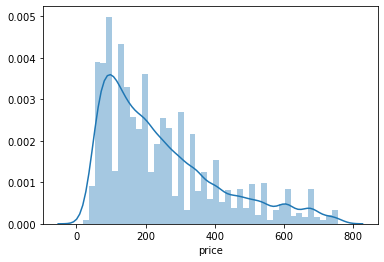

In [108]:
airbnb_price_distribution = sns.distplot(airbnb_within_iqr_1point5.loc[:,"price"])

## Spatial Distribution

### How many rentals in each district?

In [20]:
airbnb_listing_count_per_district = airbnb_df.loc[:,"district_eng"].value_counts()
airbnb_listing_count_per_district

Beyoglu          4879
Sisli            2707
Fatih            2354
Kadikoy          1895
Besiktas         1533
Uskudar           661
Esenyurt          456
Kagithane         431
Sariyer           323
Atasehir          292
Maltepe           290
Bakirkoy          245
Bahcelievler      203
Basaksehir        183
Adalar            170
Umraniye          164
Pendik            163
Eyup              148
Kartal            138
Kucukcekmece      136
Buyukcekmece      129
Avcilar           128
Bagcilar          121
Beykoz             96
Zeytinburnu        94
Beylikduzu         83
Sile               77
Gungoren           64
Tuzla              63
Gaziosmanpasa      60
Cekmekoy           44
Silivri            35
Sancaktepe         34
Bayrampasa         24
Esenler            19
Sultanbeyli        18
Sultangazi         17
Arnavutkoy         10
Catalca             8
Name: district_eng, dtype: int64

## Bivariate Analysis